# Projet M1 

#### Initialisation et dépendances 
Le premier bloc permet de désactiver le scrolling automatique et le second charge les bibliothèques nécessaires.

In [23]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function (lines) { return false ; }

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io.wavfile as sw
import math
from scipy import signal
from scipy.signal import butter, lfilter
from operator import add

# Fichier audio

La source du fichier audio qui sera utilisée par le reste du programme peut être configurée dans la cellule ci-dessous.

In [3]:
# Source
file = "src/test2.wav"

#### Spectre d'amplitude

Il représente l'amplitude relative des impulsions sonores (en ordonnée) selon le temps (en abscisse).

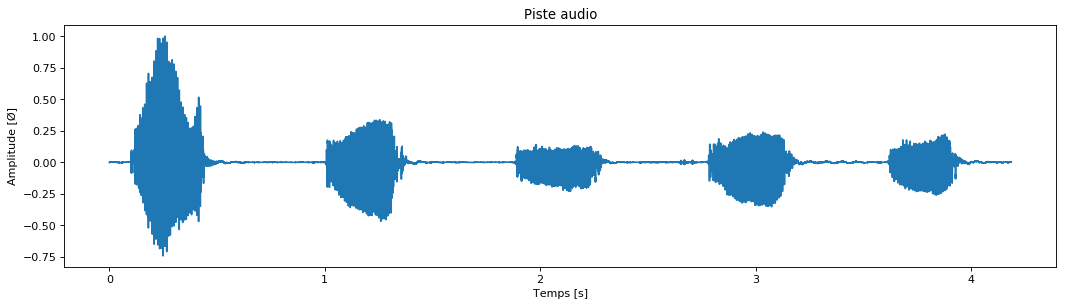

In [33]:
# Lecture du fichier audio
fs, y = sw.read(file)
# y = np.array(y, dtype=float)
yn = y/max(y)

# Nombre d'échantillons et échelle temporelle
N = len(y)
t = np.linspace(0, N/fs, N)

# Affichage du spectre d'amplitude
plt.figure(figsize=(16, 4), dpi= 80, facecolor="w", edgecolor="k")
plt.title("Piste audio")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude [Ø]")
plt.plot(t, yn)
plt.show()

#### Spectrogramme

Il représente la densité spectrale de puissance (par nuances de couleurs) par fréquence (en ordonnée) selon le temps (en abscisse). Les couleurs chaudes indiquent une forte énergie tandis que les couleurs froides en montrent l'absence.

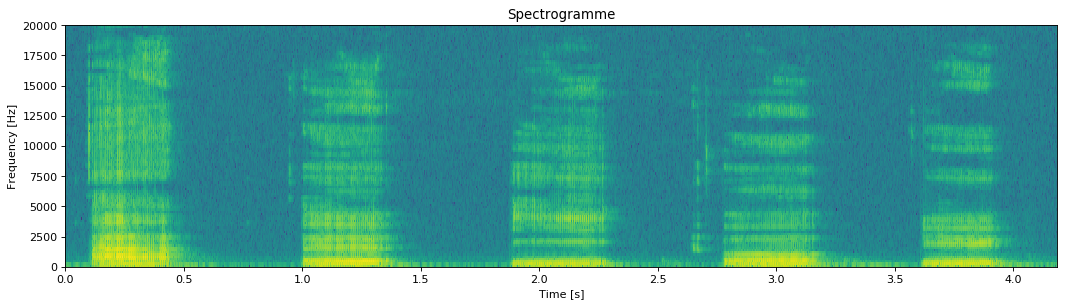

In [29]:
# Affichage du spectrogramme
plt.figure(figsize=(16, 4), dpi= 80, facecolor="w", edgecolor="k")
plt.title("Spectrogramme")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.specgram(y, Fs=fs)
plt.ylim([0, 20000])
plt.show()

# Banque de filtres

Ci-dessous peuvent être configurés les différents paramètres de la banque de filtres, tels que le nombre de filtres à utiliser et sa plage de fréquence, ainsi que l'ordre et le facteur de qualité de chaque filtre.

Il est aussi possible de configurer les spectrogrammes en modifiant la valeur de saturation de la densité spectrale de puissance ainsi que le seuil d'activité des filtres ainsi que la résolution temporelle.

In [6]:
# Nombre de filtres
nb_filters = 16
# Fréquence minimal
fmin = 300
# Fréquence maximal
fmax = 3000

# Ordre des filtres
n = 3
# Facteur de qualité
q = 3

# Valeur de saturation de la densité spectrale de puissance  
psd_max = 10
# Seuil de puissance de densité spectrale pour être considérer actif
psd_treshold = 7
# Résolution temporelle des spectrogramme (entre 0 et 1)
time_res = 1.00

#### Passe-bande (butterworth)
La fonction ci-dessous permet de générer un filtre passe-bande.
* fc : Fréquence centrale
* q : Facteur de qualité
* n : Ordre du filtre
* fs : Fréquence d'échantillonage (celle-ci est normalement définie automatiquement par le fichier audio chargé)

Et retourne les composantes suivantes :
* filter : Filtre de Butterworth avec les caractéristiques indiquées
* fc : Fréquence centrale
* fl : Fréquence de coupure (basse)
* fh : Fréquence de coupure (haute)

In [7]:
def bandpass(fc, q, n, fs):
    # Calcul de la bande passante grâce au facteur de qualité
    df = fc / q
    # Calcul de la fréquence de Nyquist
    nyq = fs / 2
    # Détermination des fréquences de coupures basses et hautes
    fl = (fc - df/2)
    fh = (fc + df/2)
    # Création du filtre de butterworth    
    return butter(N=n, Wn=[fl/nyq, fh/nyq], btype="band"), fc, fl, fh

#### Génération de la banque de filtres

Le passage ci-dessous génère et stocke les différents filtres de la banque.

In [8]:
# Banque des filtres
filters = []
filters_fq = []
# Calcul du pas
step = round((fmax-fmin)/nb_filters)
# Génération des filtres
for fc in range(fmin, fmax, step):
    bp, fc, fl, fh = bandpass(fc, q, n, fs)
    filters.append(bp)
    filters_fq.append({"fc":fc, "fl":fl, "fh":fh})

#### Réponse fréquentielle de la banque de filtres

Le passage ci-dessous affiche les réponses fréquentielle de chaque filtre de la banque sur la plage des sons audibles par l'oreille humaine.

C:\ProgramUser\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


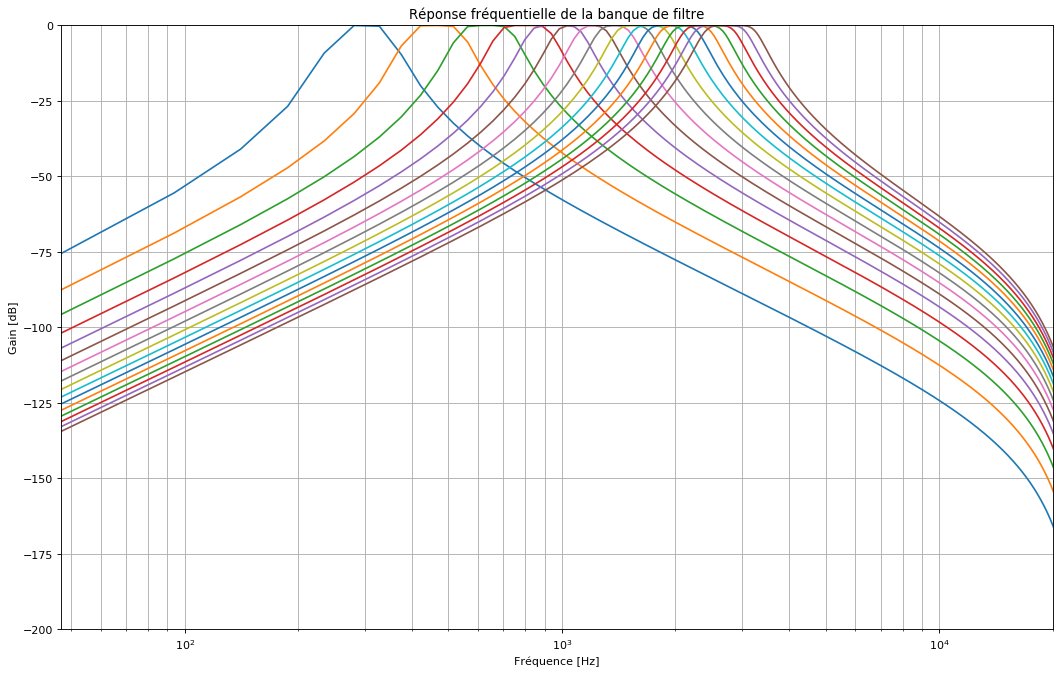

In [34]:
# Préparation de l'affichage
plt.figure(figsize=(16, 10), dpi= 80, facecolor="w", edgecolor="k")

# Affichage des filtres
for i in range(len(filters)):
    # Calcul de la réponse fréquentielle du filtre
    b, a = filters[i]
    w, h = signal.freqz(b, a)
    # Affichage
    plt.semilogx((fs/(2*np.pi))*w, 20 * np.log10(abs(h)));

# Données d'affichage
plt.title("Réponse fréquentielle de la banque de filtre")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Gain [dB]")
plt.xlim([0, 20000])
plt.ylim([-200, 0])
plt.grid(which="both", axis="both")
plt.show()

#### Application de la banque de filtres

Le passage ci-dessous applique les filtres précédents sur le signal audio présent dans le fichier source.

In [10]:
# Signaux filtrés
filtered = []
filtered.append(y)
t = np.linspace(0, N/fs, N)
# Application de la banque de filtres
for i in range(len(filters)):
    # Calcul de la réponse
    b, a = filters[i]
    filtered.append(lfilter(b, a, y))

In [ ]:
#### Etats des filtres


In [20]:
# Etats des filtres
states = []
states_sequences = [] 
def state_at(s, filter_no):
    # Calcul de l'indice dans la séquence
    i = 0
    while (i < len(states_sequences)) and (states_sequences[i] < s):
        i = i+1
    # Retourne l'état du filtre au temps spécifié
    return states[filter_no][i]

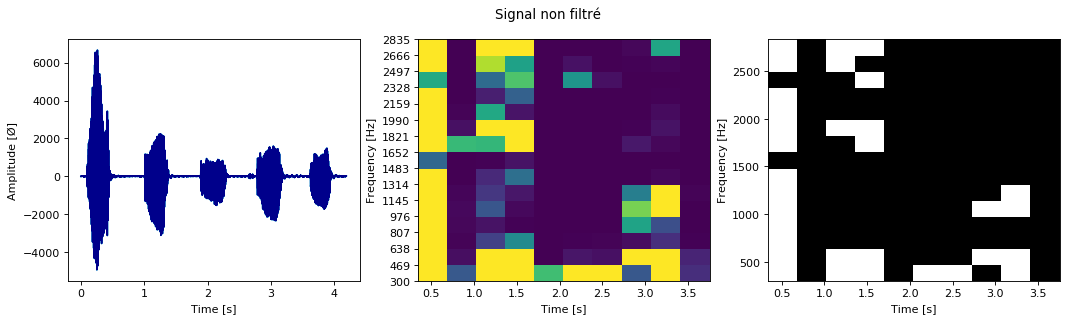

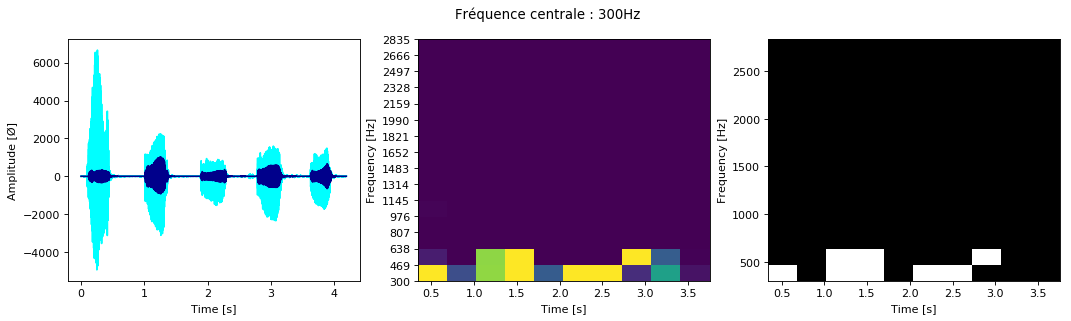

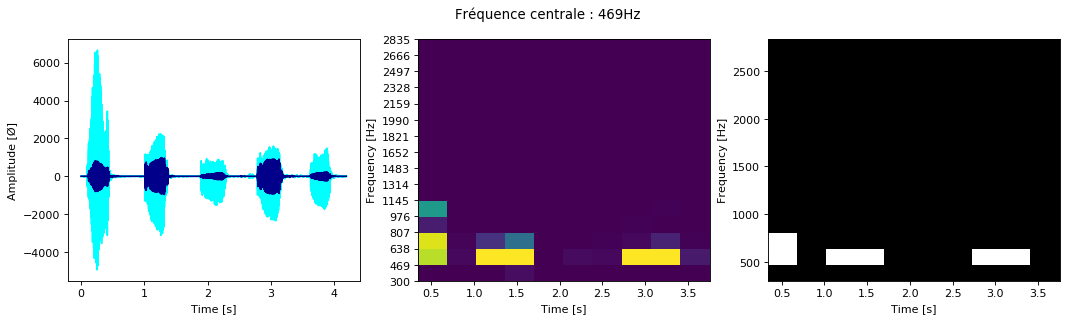

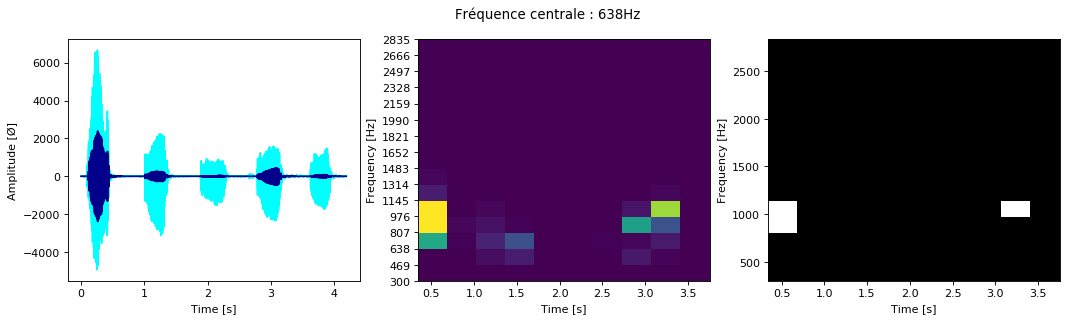

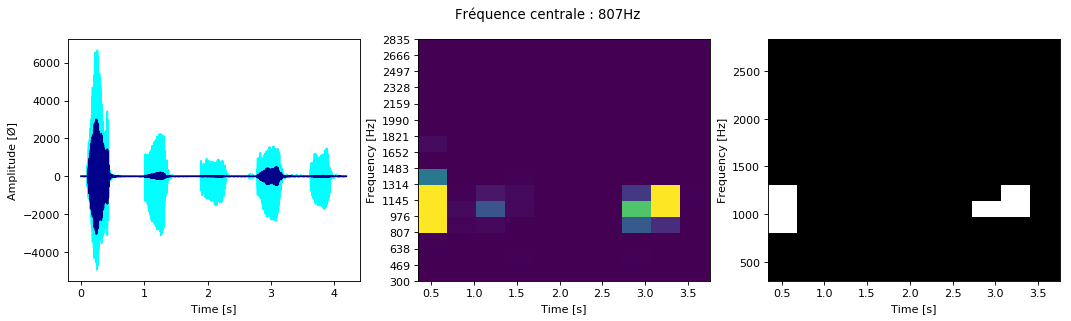

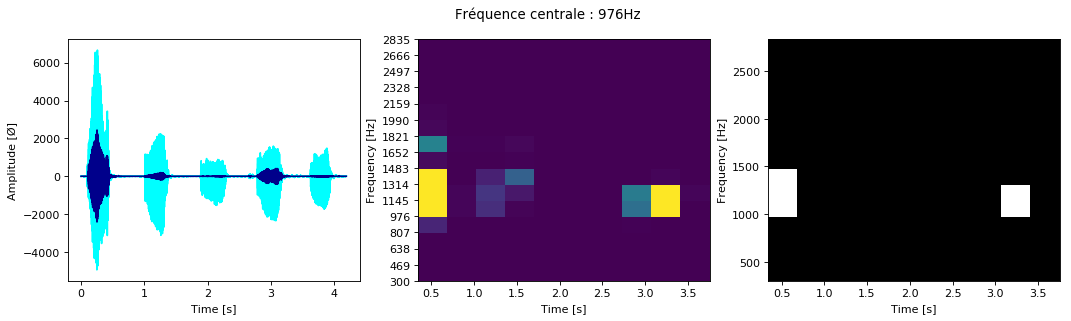

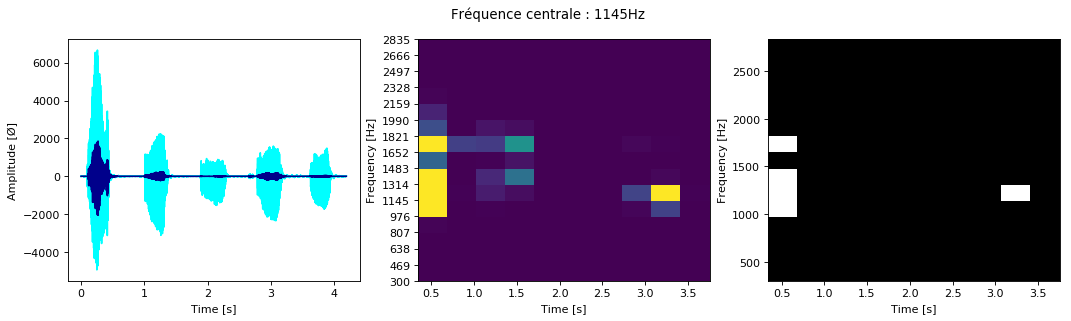

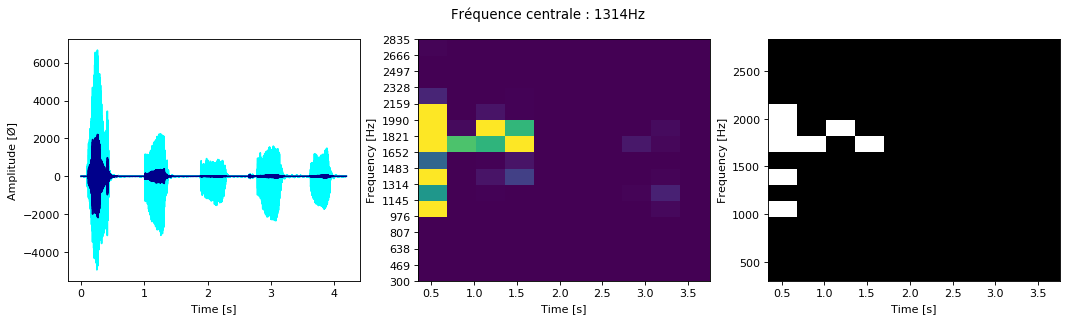

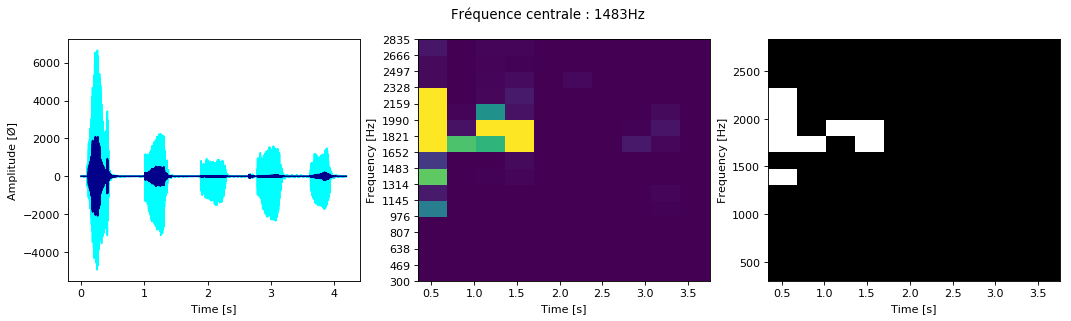

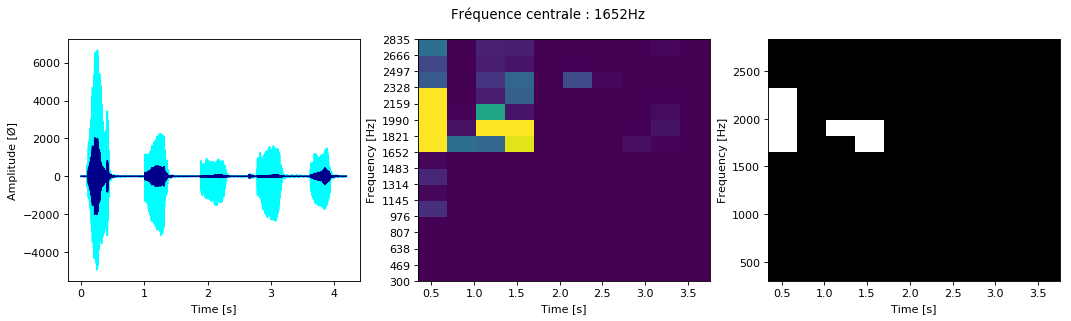

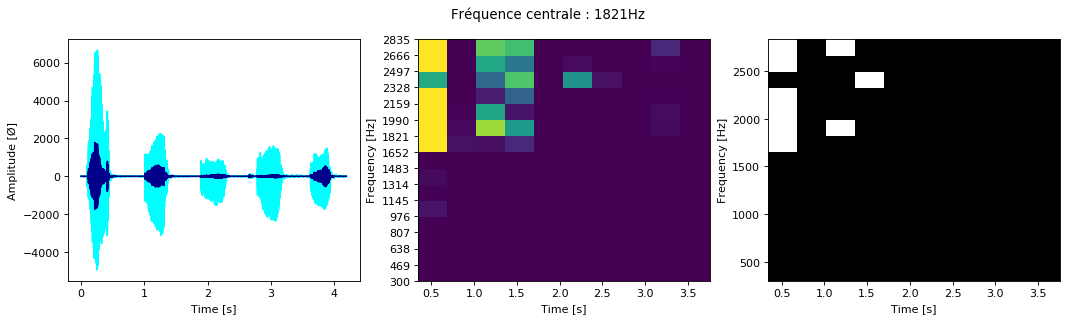

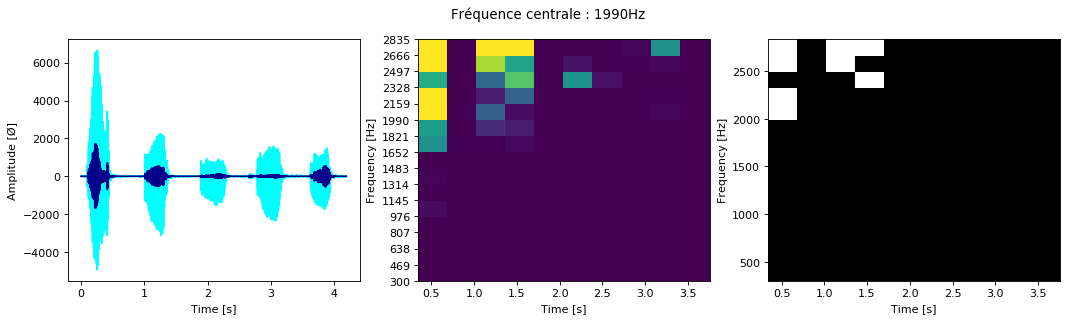

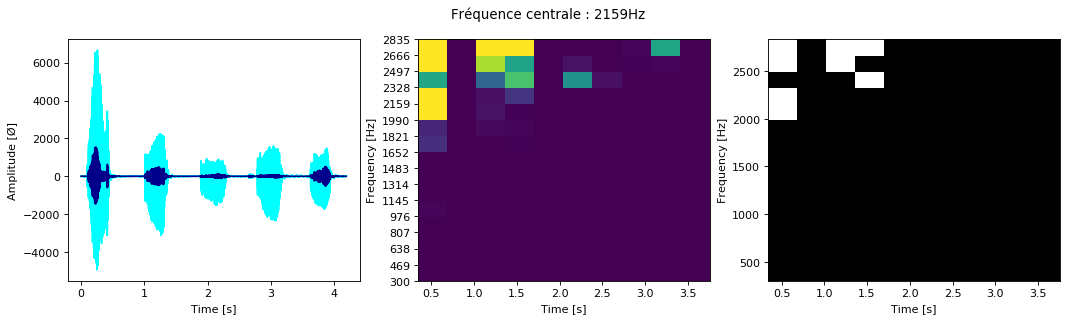

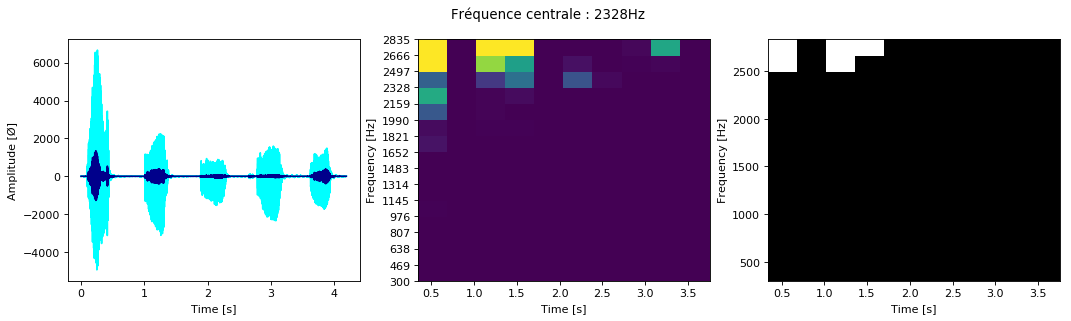

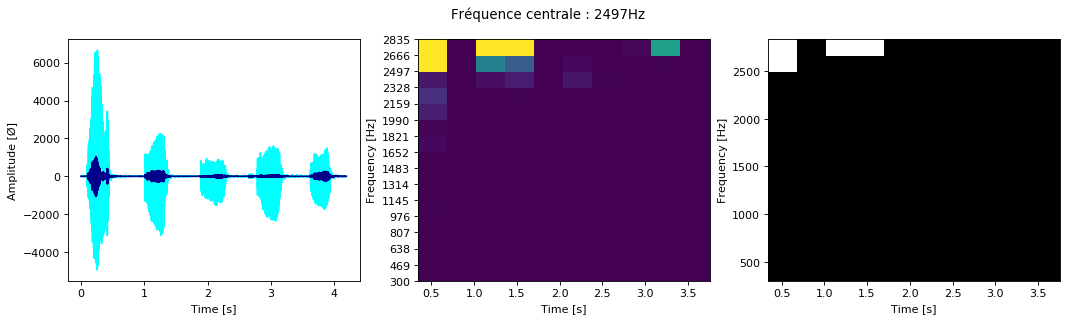

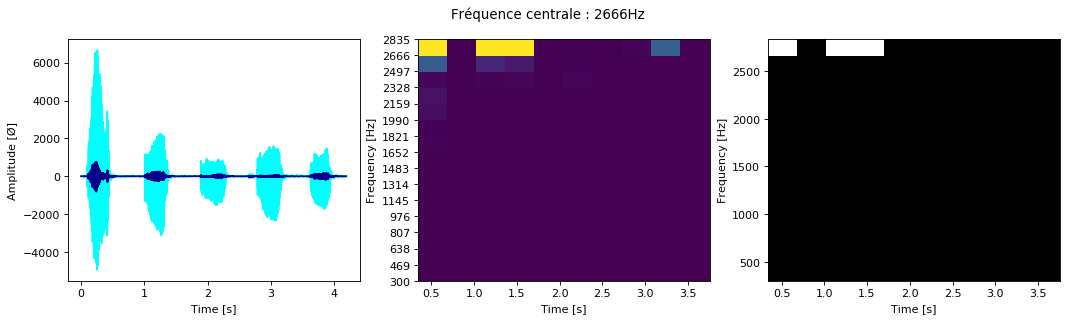

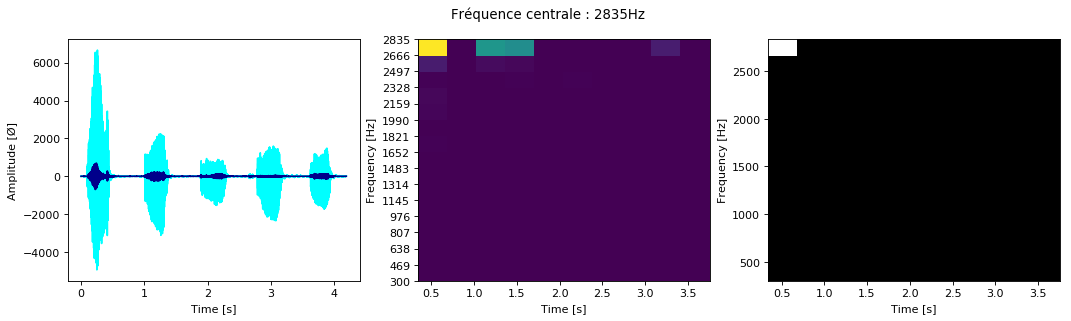

In [22]:
# Affichage des signaux filtrés
for i in range(len(filtered)):
    # Préparation des figures
    f, ax = plt.subplots(1, 3, figsize=(16, 4), dpi= 80, facecolor="w", edgecolor="k")
    f.suptitle("Signal non filtré" if i == 0 else "Fréquence centrale : "+str(filters_fq[i-1]["fc"])+"Hz")
    # Affichage du spectre d'amplitude
    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Amplitude [Ø]")
    ax[0].plot(t, y, color="aqua")
    ax[0].plot(t, filtered[i], color="darkblue")
    
    # Préparation du spectrogramme
    NFFT = 2**int(math.log(fs, 2))
    spectrum, freqs, time, img = ax[1].specgram(filtered[i], Fs=fs, NFFT=NFFT, noverlap=time_res*(NFFT/2))
    ax[1].cla()
    ax[1].set_ylabel("Frequency [Hz]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_yticks(np.arange(fmin, fmax, step))
    
    # Traitement des données spectrogramme
    rspectrum = []; rfreqs = [];
    for j in range(len(filters_fq)):
        # Récupération des index des fréquences centrales, basses et hautes
        fc = np.argmin(np.abs(freqs - filters_fq[j]["fc"]))
        fl = np.argmin(np.abs(freqs - filters_fq[j]["fl"]))
        fh = np.argmin(np.abs(freqs - filters_fq[j]["fh"]))
        # Somme des valeurs entre la fréquence de coupure basse et haute
        summed = spectrum[fl]
        for k in range(fl+1, fh):
            map(add, summed, spectrum[k])
        # Ajout des données
        rspectrum.append(np.clip(summed, 0, psd_max))
        rfreqs.append(freqs[fc])
    # Affichage du spectrogramme
    ax[1].pcolormesh(time, rfreqs, rspectrum)
    ax[1].plot()
    
    # Traitement de états
    for j in range(len(rspectrum)):
        for k in range(len(rspectrum[j])):
            rspectrum[j][k] = rspectrum[j][k] > psd_treshold
            
    # Affichage des différents états
    ax[2].pcolormesh(time, rfreqs, rspectrum, cmap=colors.ListedColormap(["black","white"]))
    ax[2].plot()
    ax[2].set_ylabel("Frequency [Hz]")
    ax[2].set_xlabel("Time [s]")
    
    # Ajout des données pour la fonction d'état
    states.append(np.transpose(rspectrum))
    states_sequences = time
    
    # Affichage
    plt.show()